In [ ]:
import pandas as pd
path="/content/drive/MyDrive/DATASET/laptop_data_cleaned.csv"
df=pd.read_csv(path)
df.head()

Abstract

This dataset provides a comprehensive overview of various laptop specifications and their pricing. It encompasses data from multiple manufacturers, highlighting diversity in the laptop market. Key attributes include the company name, type of laptop, RAM capacity, weight, and price. Additionally, the dataset delves into specific features such as touchscreen capability, IPS technology presence, and pixel per inch (PPI) density, offering insights into the display quality of the laptops. It further categorizes the central processing units (CPUs) by brand, and details the storage options in terms of HDD and SSD capacities. The inclusion of GPU brand and operating system type adds another dimension to the analysis, allowing for a multifaceted understanding of the laptops' performance and user preferences.


Q1) What are the data types? (Only numeric and categorical)
A) Dataset consists for 13 characteristics. They are
Company: Categorical
TypeName: Categorical
 Ram: Numerical
Weight: Numerical
Price: Numerical
 Touch Screen: Numerical
 Ips: Numerical
 Ppi: Numerical
 Cpu brand: Categorical
 HDD: Numerical
SSD: Numerical
Gpu brand: Categorical
Os: Categorical

There are a total of 1273 observations.



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pylab as plt
from matplotlib import pyplot
data = pd.read_csv('laptop_data_cleaned.csv',encoding='ISO-8859-1')
print(data.to_string)

<bound method DataFrame.to_string of      Company            TypeName  Ram  Weight      Price  TouchScreen  Ips  \
0      Apple           Ultrabook    8    1.37  11.175755            0    1   
1      Apple           Ultrabook    8    1.34  10.776777            0    0   
2         HP            Notebook    8    1.86  10.329931            0    0   
3      Apple           Ultrabook   16    1.83  11.814476            0    1   
4      Apple           Ultrabook    8    1.37  11.473101            0    1   
...      ...                 ...  ...     ...        ...          ...  ...   
1268    Asus            Notebook    4    2.20  10.555257            0    0   
1269  Lenovo  2 in 1 Convertible    4    1.80  10.433899            1    1   
1270  Lenovo  2 in 1 Convertible   16    1.30  11.288115            1    1   
1271  Lenovo            Notebook    2    1.50   9.409283            0    0   
1272      HP            Notebook    6    2.19  10.614129            0    0   

             Ppi          

2Q) Are there missing values?

Based on the initial data inspection performed, there were no missing values in the dataset. Each column had a count of 1273 non-null entries, which matches the total number of rows in the dataset.


In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64


3Q) What are the likely distributions of the numeric variables?
A) Ram, weight, HDD and SSD, Ppi, Touch Screen and Ips, Price these are the numeric variables which are used to represent likely distribution.


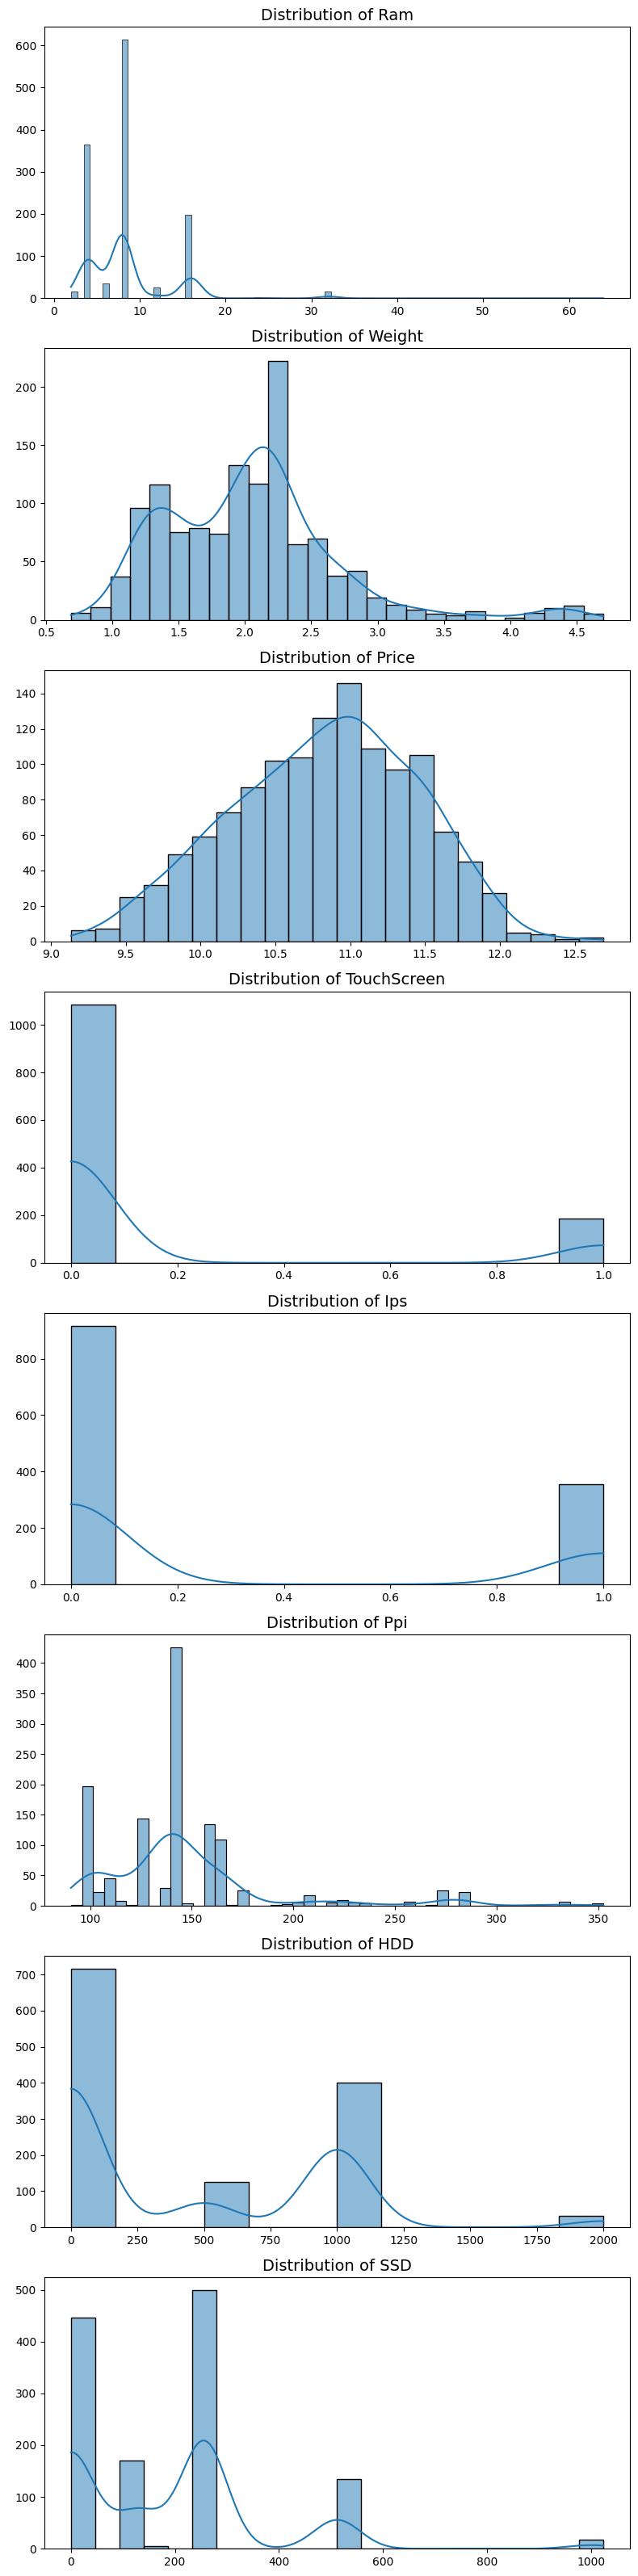

In [ ]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
def plot_distributions(df, columns):
    fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(8, 4 * len(columns)))
    for ax, col in zip(axes, columns):
        sns.histplot(df[col], ax=ax, kde=True)
        ax.set_title(f'Distribution of {col}', fontsize=14)
        ax.set_xlabel('')
        ax.set_ylabel('')
    plt.tight_layout()
    return fig
fig = plot_distributions(data, numeric_columns)
plt.show()

4Q) Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)
A) To determine which independent variables are most useful for predicting a target variable in a dataset, we can employ various feature selection methods. Since your target variable is 'Price', we use these 3 methods. They are


1.Correlation Matrix: Identifying variables that have a strong correlation with the target variable.

2.Random Forest Feature Importance: Using a Random Forest model to evaluate the importance of each feature.

3.Recursive Feature Elimination (RFE): Systematically removing features to see which ones have the most impact on the model's accuracy.


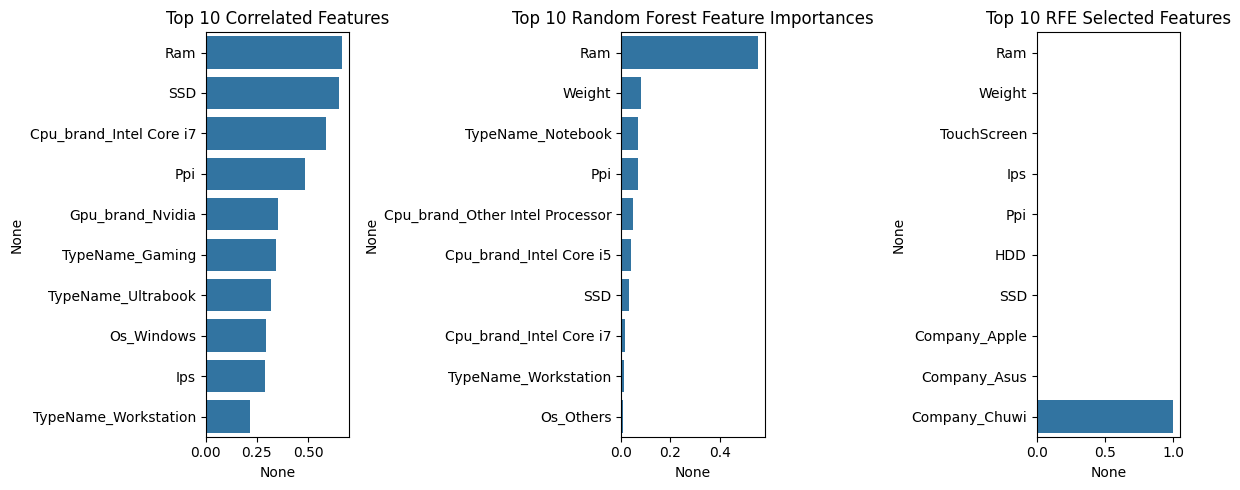

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
# Preparing the data
X = data.drop('Price', axis=1)  # Independent variables
y = data['Price']               # Target variable

# Encoding categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Method 1: Correlation Matrix
corr_matrix = X_train.corrwith(y_train).sort_values(ascending=False)

# Method 2: Random Forest Feature Importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Method 3: Recursive Feature Elimination (RFE) with Linear Regression
lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=10)  # Adjust number of features to select as needed
rfe.fit(X_train, y_train)
rfe_support = rfe.support_
rfe_ranking = rfe.ranking_
rfe_features = pd.Series(rfe_support, index=X_train.columns)

# Plotting the results
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.barplot(x=corr_matrix.head(10), y=corr_matrix.head(10).index)
plt.title('Top 10 Correlated Features')

plt.subplot(1, 3, 2)
sns.barplot(x=feature_importances.head(10), y=feature_importances.head(10).index)
plt.title('Top 10 Random Forest Feature Importances')

plt.subplot(1, 3, 3)
sns.barplot(x=rfe_features.head(10), y=rfe_features.head(10).index)
plt.title('Top 10 RFE Selected Features')

plt.tight_layout()
plt.show()

5Q) Which independent variables have missing data? How much?

Ans) The dataset does not have any missing values.


In [ ]:
# Checking for missing values in each column
missing_data = data.isnull().sum()

# Displaying the columns with missing values and their count
missing_data = missing_data[missing_data > 0]
print(missing_data)

Series([], dtype: int64)


6Q) Do the training and test sets have the same data?

Ans) The training and test sets have similar distributions of data, you can compare summary statistics (like mean, standard deviation).

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.read_csv('laptop_data_cleaned.csv',encoding='ISO-8859-1')
# # Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

# Comparing key statistics of the training and test sets
train_stats = X_train.describe()
test_stats = X_test.describe()

# Displaying the statistics for comparison
print("Training Set Statistics:\n", train_stats)
print("\nTest Set Statistics:\n", test_stats)

Training Set Statistics:
                Ram       Weight        Price  TouchScreen          Ips  \
count  1018.000000  1018.000000  1018.000000  1018.000000  1018.000000   
mean      8.493124     2.032631    10.836957     0.145383     0.282908   
std       5.184924     0.668041     0.616769     0.352660     0.450633   
min       2.000000     0.690000     9.134616     0.000000     0.000000   
25%       4.000000     1.492500    10.402328     0.000000     0.000000   
50%       8.000000     2.040000    10.882316     0.000000     0.000000   
75%       8.000000     2.300000    11.288115     0.000000     1.000000   
max      64.000000     4.700000    12.587883     1.000000     1.000000   

               Ppi          HDD          SSD  
count  1018.000000  1018.000000  1018.000000  
mean    147.100010   419.607073   186.062868  
std      43.789694   515.519281   190.116137  
min      90.583402     0.000000     0.000000  
25%     127.335675     0.000000     0.000000  
50%     141.211998     0.

7Q) In the predictor variables independent of all the other predictor variables?
Ans) the predictor variables in our dataset are independent of each other, we can calculate the correlation between each pair of variables. This is typically done using a correlation matrix, which shows the correlation coefficients between every pair of variables in our dataset. The resulting heatmap will show you the correlation coefficients between each pair of variables.


<ipython-input-24-0d49645327a5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


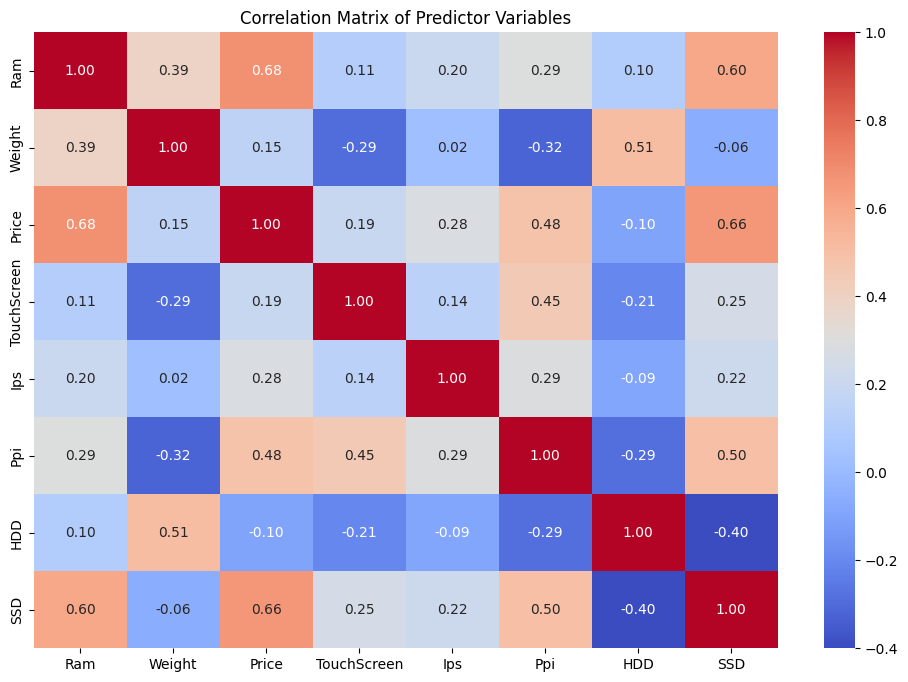

In [ ]:
# Calculating the correlation matrix
correlation_matrix = data.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Predictor Variables")
plt.show()

8Q) Which predictor variables are the most important?
Ans) Predictor variables in a dataset are most crucial, particularly when considering a target variable, we may utilize machine learning models that offer feature significance metrics. A popular and successful method is to use a Random Forest or other tree-based model. These models may offer a feature significance rating and handle both numerical and categorical data.


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# # Preparing the data (assuming 'Price' is the target variable)
# # Replace 'Price' with your actual target variable name
X = data.drop('Price', axis=1)
y = data['Price']
#
# # Converting categorical variables to dummy variables
X = pd.get_dummies(X)
#
# # Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#
# # Creating and training the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
#
# # Getting feature importances
feature_importances = rf_model.feature_importances_
#
# # Creating a DataFrame to view feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
#
# # Displaying the feature importances
print(feature_importance_df)

                            Feature  Importance
0                               Ram    0.554884
1                            Weight    0.079079
29                TypeName_Notebook    0.069351
4                               Ppi    0.066894
36  Cpu_brand_Other Intel Processor    0.050092
34          Cpu_brand_Intel Core i5    0.036525
6                               SSD    0.030248
35          Cpu_brand_Intel Core i7    0.011856
31             TypeName_Workstation    0.010345
41                        Os_Others    0.007939
42                       Os_Windows    0.006798
14                       Company_HP    0.006555
2                       TouchScreen    0.006214
5                               HDD    0.006145
3                               Ips    0.006097
7                      Company_Acer    0.004778
33          Cpu_brand_Intel Core i3    0.004746
32          Cpu_brand_AMD Processor    0.004598
17                   Company_Lenovo    0.004389
9                      Company_Asus    0

9Q) Do the ranges of the predictor variables make sense?

Ans) predictor variables in your dataset make sense, you can inspect the minimum and maximum values along with basic descriptive statistics for each predictor variable.


In [ ]:
predictor_variables = data.drop('Price', axis=1)

# Calculating descriptive statistics for the predictor variables
descriptive_stats = predictor_variables.describe()

# Displaying the descriptive statistics
print(descriptive_stats)

               Ram       Weight  TouchScreen          Ips          Ppi  \
count  1273.000000  1273.000000  1273.000000  1273.000000  1273.000000   
mean      8.447761     2.041100     0.146897     0.279654   146.950812   
std       5.098771     0.669241     0.354142     0.449006    42.926775   
min       2.000000     0.690000     0.000000     0.000000    90.583402   
25%       4.000000     1.500000     0.000000     0.000000   127.335675   
50%       8.000000     2.040000     0.000000     0.000000   141.211998   
75%       8.000000     2.310000     0.000000     1.000000   157.350512   
max      64.000000     4.700000     1.000000     1.000000   352.465147   

               HDD          SSD  
count  1273.000000  1273.000000  
mean    413.715632   186.252946  
std     518.054486   186.531571  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000   256.000000  
75%    1000.000000   256.000000  
max    2000.000000  1024.000000  


10Q)  What are the distributions of the predictor variables?

Ans) the distributions of the predictor (independent) variables in your dataset, we can create histograms for each of these variables. Histograms are useful for visualizing the distribution of data points across different ranges of values


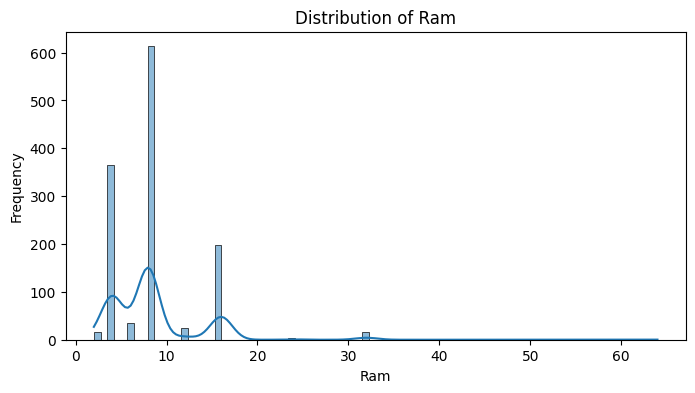

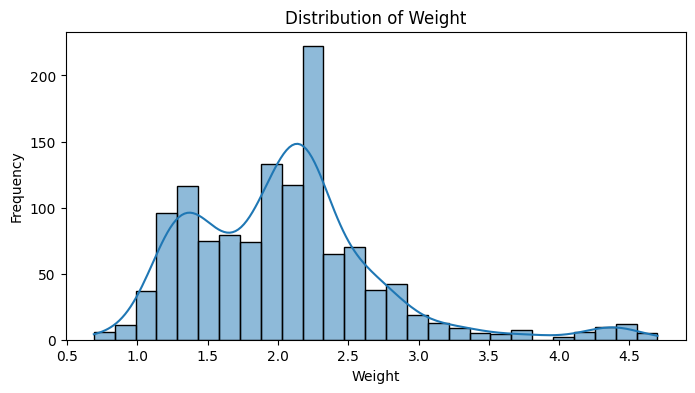

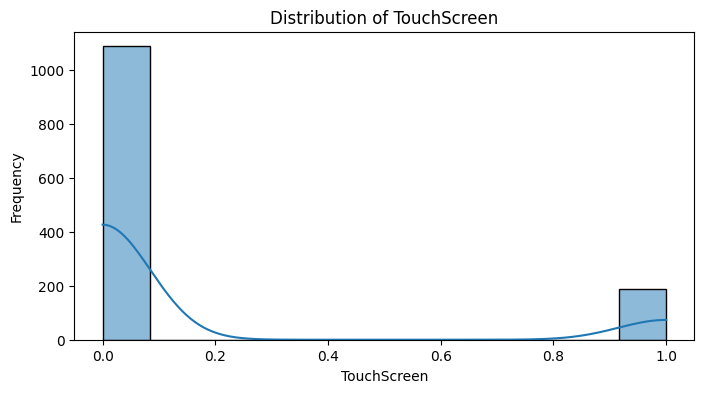

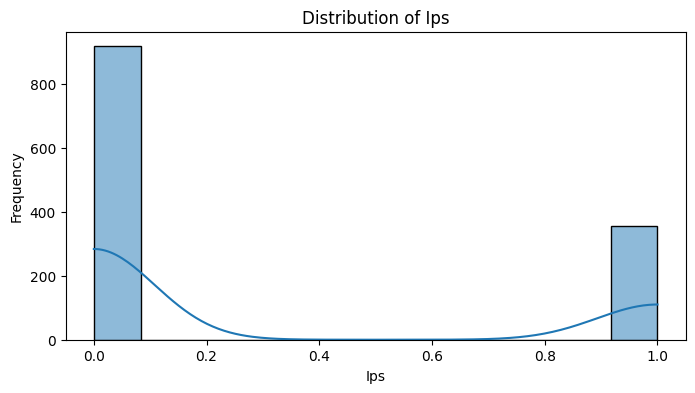

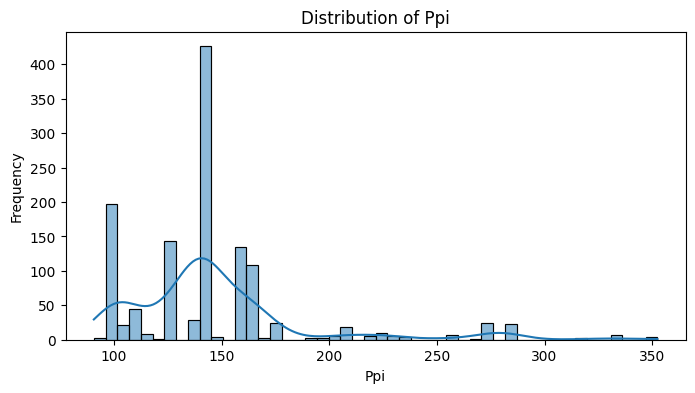

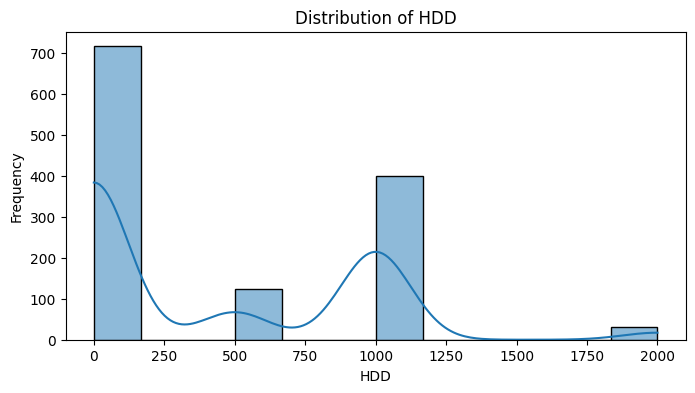

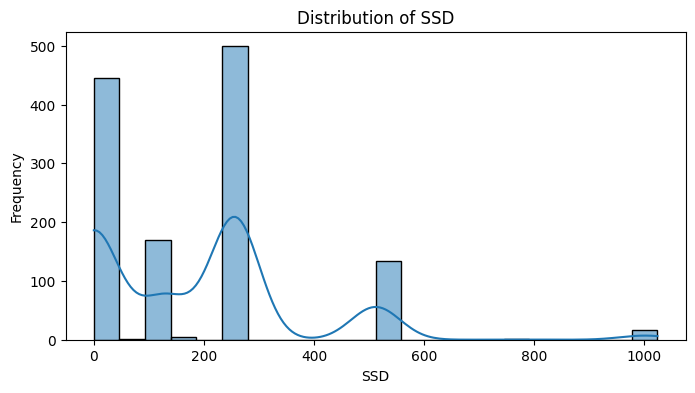

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('laptop_data_cleaned.csv',encoding='ISO-8859-1') # Replace with the path to your dataset
data = pd.read_csv('laptop_data_cleaned.csv',encoding='ISO-8859-1')

# Drop the target variable to focus on predictor variables
data = data.drop('Price', axis=1)

# Identify numeric predictor variables
numeric_predictors = data.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for each numeric predictor variable
for column in numeric_predictors:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


11 Remove outliers and keep outliers (does if have an effect of the final predictive model)?

Ans) you can follow these steps:

1 Detect and Remove Outliers: Find any outliers in your dataset and make a new dataset that doesn't contain any of them.

2 Model Training and Evaluation with Outliers: Utilizing the original dataset—which contains outliers—train a model and assess its efficacy.

3 Model Training and Evaluation without Outliers: Apply the same model type to the dataset devoid of outliers and assess the model's performance.

4 Compare Performances: To determine the impact, compare the performance measures of the models trained with and without outliers.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load and prepare the dataset
file_path = 'laptop_data_cleaned.csv'  # Replace with your dataset path
data = pd.read_csv('laptop_data_cleaned.csv',encoding='ISO-8859-1')
X = data.drop('Price', axis=1)  # Predictor variables
y = data['Price']               # Target variable

# Encoding categorical variables (if any)
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Function to remove outliers based on Z-score
from scipy import stats
import numpy as np

def remove_outliers(df, threshold=3):
    z = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
    return df[(z < threshold).all(axis=1)]

# Removing outliers
X_train_no_outliers = remove_outliers(X_train)

# Aligning the target variable with the removed outliers
y_train_no_outliers = y_train[X_train_no_outliers.index]

# Train model with outliers
model_with_outliers = RandomForestRegressor(random_state=42)
model_with_outliers.fit(X_train, y_train)
predictions_with = model_with_outliers.predict(X_test)
mse_with = mean_squared_error(y_test, predictions_with)
r2_with = r2_score(y_test, predictions_with)

# Train model without outliers
model_without_outliers = RandomForestRegressor(random_state=42)
model_without_outliers.fit(X_train_no_outliers, y_train_no_outliers)
predictions_without = model_without_outliers.predict(X_test)
mse_without = mean_squared_error(y_test, predictions_without)
r2_without = r2_score(y_test, predictions_without)

# Comparing the results
print("With Outliers - MSE:", mse_with, "R2:", r2_with)
print("Without Outliers - MSE:", mse_without, "R2:", r2_without)


With Outliers - MSE: 0.04578947924051632 R2: 0.8844060935503391
Without Outliers - MSE: 0.057023755810451146 R2: 0.8560455632190485


12Q Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

Ans Remove Random Portions of Data: Remove 1%, 5%, and 10% of data randomly from your dataset.

Apply Different Imputation Methods: Three different methods to impute the missing values. Common methods are mean imputation, median imputation, and K-Nearest Neighbors (KNN) imputation.

Evaluate Recovery of Missing Values: Compare the imputed values with the original ones (before removal) to calculate the percentage error on residuals for numeric data.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = 'laptop_data_cleaned.csv'  # Replace with your dataset path
data = pd.read_csv('laptop_data_cleaned.csv',encoding='ISO-8859-1')

# Choose only numeric columns for simplicity in calculating errors
data_numeric = data.select_dtypes(include=[np.number])

# Split the data into training and test sets
X_train, X_test = train_test_split(data_numeric, test_size=0.2, random_state=42)

# Function to remove a random percentage of data
def remove_random_data(df, percentage):
    df_copy = df.copy()
    for column in df_copy.columns:
        num_missing = int(df_copy[column].shape[0] * percentage)
        missing_indices = np.random.choice(df_copy[column].shape[0], num_missing, replace=False)
        df_copy.iloc[missing_indices, df_copy.columns.get_loc(column)] = np.nan
    return df_copy

# Function to evaluate imputation
def evaluate_imputation(original_data, imputed_data):
    mse = mean_squared_error(original_data, imputed_data)
    return np.sqrt(mse)  # Return RMSE for easier interpretation

# Imputation methods
imputers = {
    'mean': SimpleImputer(strategy='mean'),
    'median': SimpleImputer(strategy='median'),
    'knn': KNNImputer(n_neighbors=5)
}

# Percentages of data to remove
percentages = [0.01, 0.05, 0.10]

# Store results
results = {}

for percentage in percentages:
    X_train_missing = remove_random_data(X_train, percentage)
    results[percentage] = {}

    for name, imputer in imputers.items():
        imputed = imputer.fit_transform(X_train_missing)
        rmse = evaluate_imputation(X_train, imputed)
        results[percentage][name] = rmse

# Display the results
for percentage, methods in results.items():
    print(f"\nPercentage of data removed: {percentage * 100}%")
    for method, rmse in methods.items():
        print(f"Imputation Method: {method}, RMSE: {rmse}")



Percentage of data removed: 1.0%
Imputation Method: mean, RMSE: 23.928892195556838
Imputation Method: median, RMSE: 30.381134644860996
Imputation Method: knn, RMSE: 20.7806450993334

Percentage of data removed: 5.0%
Imputation Method: mean, RMSE: 47.05241095537482
Imputation Method: median, RMSE: 59.41583694425587
Imputation Method: knn, RMSE: 29.0734528981419

Percentage of data removed: 10.0%
Imputation Method: mean, RMSE: 60.787757488890584
Imputation Method: median, RMSE: 77.56376789780627
Imputation Method: knn, RMSE: 39.24478697968616


10Q For categorical data, calculate the accuracy and a confusion matrix.

Ans First preprocess the data, choose the classification model, Train the model, make prediction on test data, compare predicted values to the accurate values and then create the confusion matrix.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'laptop_data_cleaned.csv'  # Replace with your dataset path
data = pd.read_csv('laptop_data_cleaned.csv',encoding='ISO-8859-1')


# Assume 'Category' is the target categorical variable and 'features' are the predictors
target = 'Os'
features = data.drop(target, axis=1)

# Encoding categorical variables (if any)
label_encoders = {}
for column in features.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    features[column] = label_encoders[column].fit_transform(features[column])

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(features, data[target], test_size=0.2, random_state=42)

# Initialize the classifier
classifier = RandomForestClassifier(random_state=42)

# Train the model
classifier.fit(X_train, y_train)

# Make predictions
predictions = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Output the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9019607843137255
Confusion Matrix:
 [[  3   0   0]
 [  0  13  20]
 [  0   5 214]]


Reference


Kaggle.com

chat.openai

 https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynbLinks